# k-NeighborsRegression

## 회귀: 두 변수 사이의 상관관계를 분석하는 방법
- 내년 경제 성장률 예측, 배달이 도착할 시간 예측 등
- 예측하려는 샘플에 가장 가까운 샘플 k개 선택 후, 이 샘플들의 임의의 수치 확인 후 평균 구하기

In [1]:
import numpy as np

In [2]:
# 데이터 준비

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

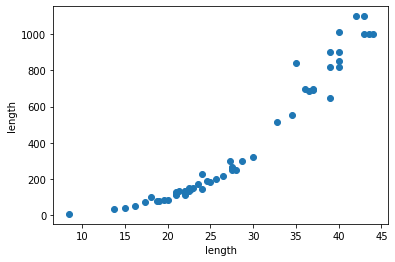

In [4]:
import matplotlib.pyplot as plt

# 농어의 길이에 따라 무게가 커짐

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('length')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [10]:
# input 값의 특성이 1개이기에 2차원 배열로 reshape

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
# knr 객체 생성
knr = KNeighborsRegressor()

# fit() 메소드로 회귀모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

## 결정계수

### 분류 
  - 정확도 : 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율

### 회귀 : 결정계수
<br>
<img src = "https://drive.google.com/uc?id=1_RUk9340iiKl_xDawgGxqwXu-vHy7hce" height = 200 width = 500> <br>

- 타깃의 평균 정도 예측 : 0애 가까워지는 값
- 예측이 타깃에 가까워짐 : 1에 가까워지는 값

<br>
- 사이킷런의 score() 메소드의 출력값은 높을수록 좋은 것!




In [14]:
# 결정계수
knr.score(test_input, test_target)

0.992809406101064

### 타깃과 예측한 값 사이의 차 구해보기

In [15]:
from sklearn.metrics import mean_absolute_error

In [16]:
# 테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차 계산
# 타깃과 예측을 뺀 값을 제곱 -> 전체 샘플에 대해 평균한 값 반환

# 예측이 평균적으로 19g 정도 타갓값과 다름
mea = mean_absolute_error(test_target, test_prediction)
print(mea)

19.157142857142862


## 과대적합, 과소적합

In [17]:
# train 세트의 결정계수 구해보기

knr.score(train_input, train_target)

0.9698823289099254

### 과대적합
- 훈련 세트에 잘 맞는 모델이기에 테스트 세트와 새로운 샘플에 대한 예측점수가 낮음

### 과소적합
- 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않음
- 훈련 세트와 테스트 세트의 점수가 모두 높거나 모두 낮은 경우
- 훈련 세트와 테스트 세트의 크기가 매우 작은 경우도 해당

<br><br>
문제 : <br>
- 훈련 세트의 결정계수가 더 높게 나와야함에도 불구하고 테스트 세트의 결정계수가 더 높게 나옴 -> 과소적합 <br>

해결책 : 
- 이웃의 개수, k 줄이기 (기본값은 5)
- k의 개수를 줄임 -> 패턴에 민감
- k의 개수를 늘림 -> 데이터 전반의 일반적 패턴을 따름

In [18]:
# 이웃의 개수 3으로 설정
knr.n_neighbors = 3

# 모델 다시 훈련
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [19]:
# 테스트 세트의 점수가 훈련 세트보다 낮아졌으므로 과소적합 문제 해결
# 점수의 차이가 크지 않으므로 과대적합의 문제도 없음
knr.score(test_input, test_target)

0.9746459963987609